# CNN Project: Human or Horse? Classification of images using Convolutional Neural Networks (CNNs)

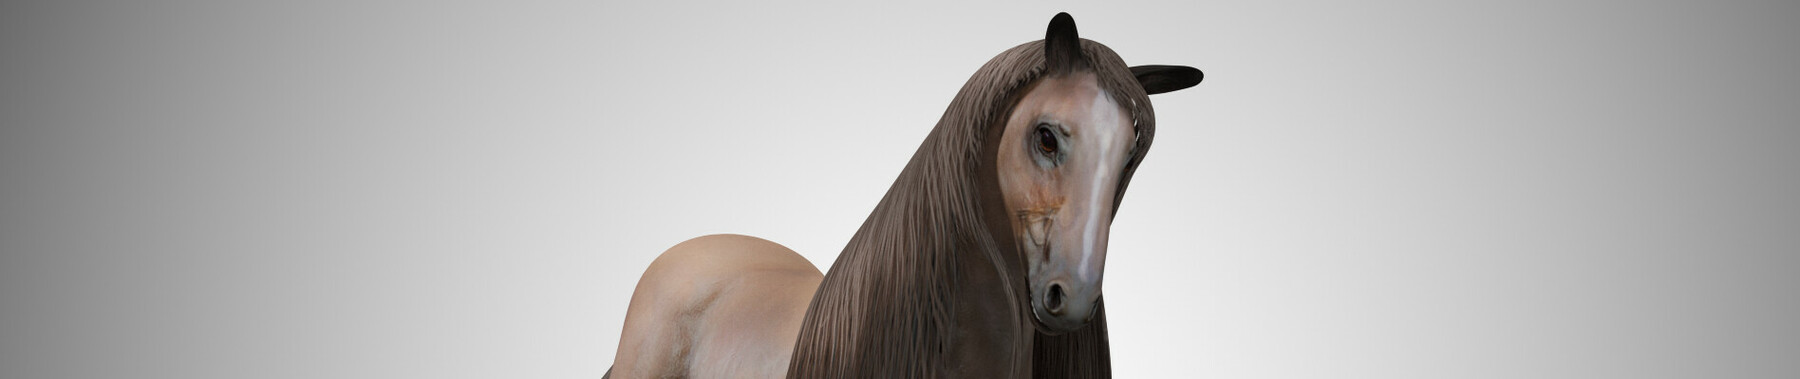

## Overview of Image Classification using CNNs

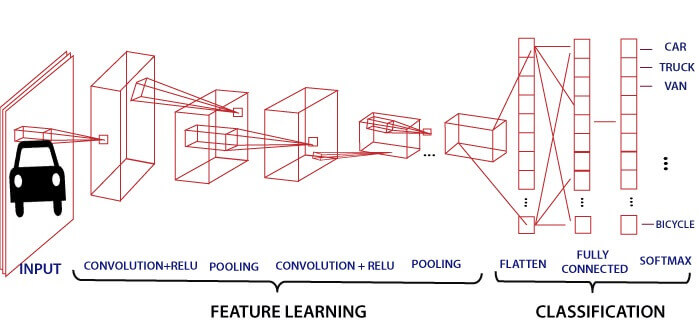

- Image classification is the task of assigning a label or category to an input image.
- CNNs use convolutional layers to extract features from images and pooling layers to reduce the spatial dimensionality of the feature maps.
- The output of the convolutional and pooling layers are then flattened and fed into fully connected layers for classification.
- CNNs can be trained end-to-end using backpropagation and gradient descent to optimize the weights of the network.
- To improve the performance of CNNs, techniques such as data augmentation, regularization, and transfer learning can be used.
- CNNs have achieved state-of-the-art performance on a variety of image classification tasks, including object recognition, face recognition, and medical image analysis.

## TensorFlow Datasets (TFDS)

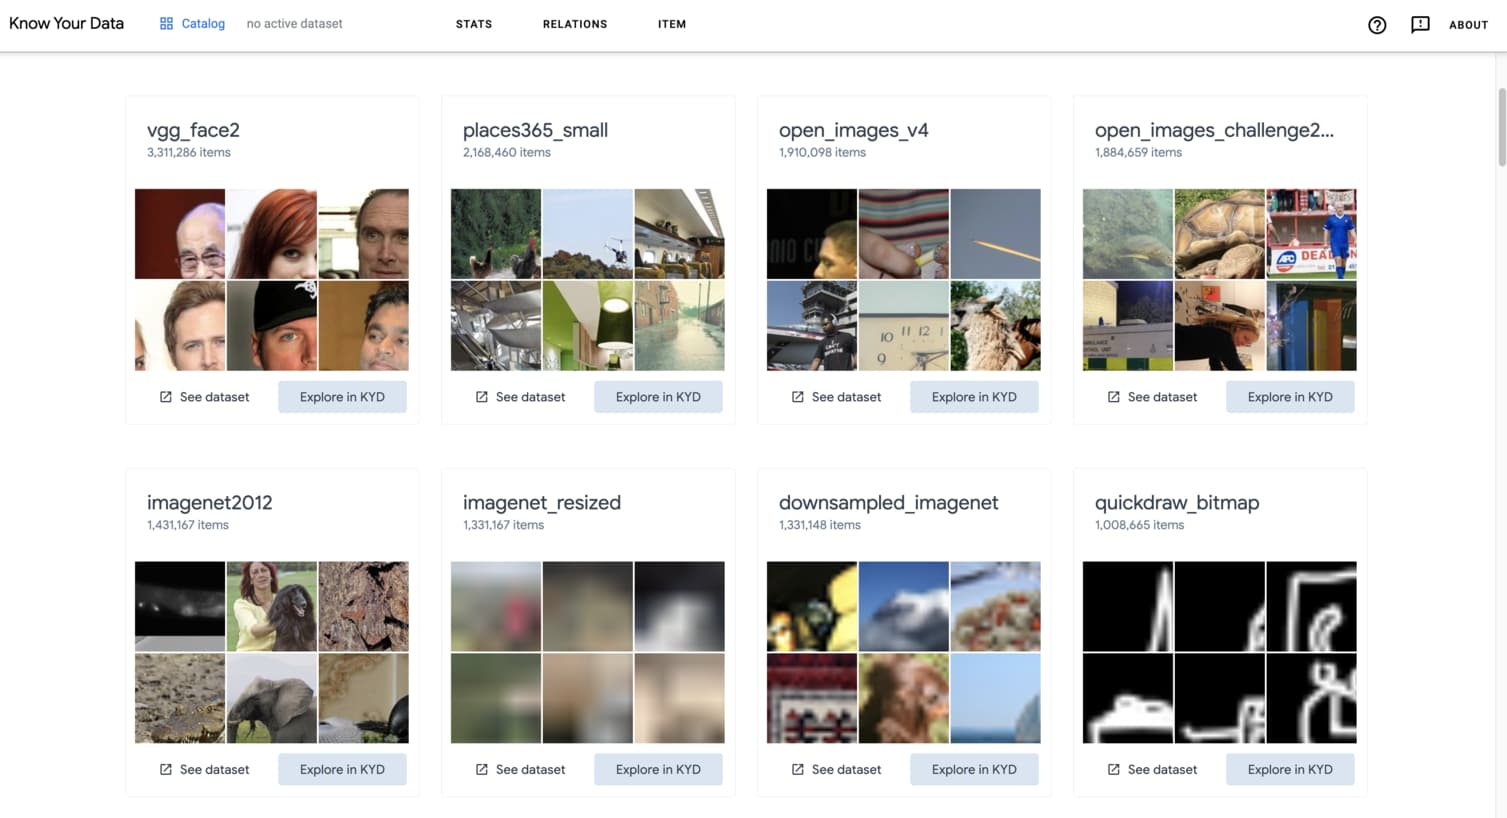


- TensorFlow Datasets (TFDS) is a collection of datasets ready to use with TensorFlow.
- It includes a wide range of datasets, including image, text, audio, video, structured, and more.
- TFDS is designed to have a unified API across platforms, and can be used with TensorFlow, TensorFlow Extended (TFX), and JAX.
- You can find the full list of datasets in the TFDS catalog. https://www.tensorflow.org/datasets/catalog/overview


## Dataset: Human or Horse?

https://www.tensorflow.org/datasets/catalog/horses_or_humans

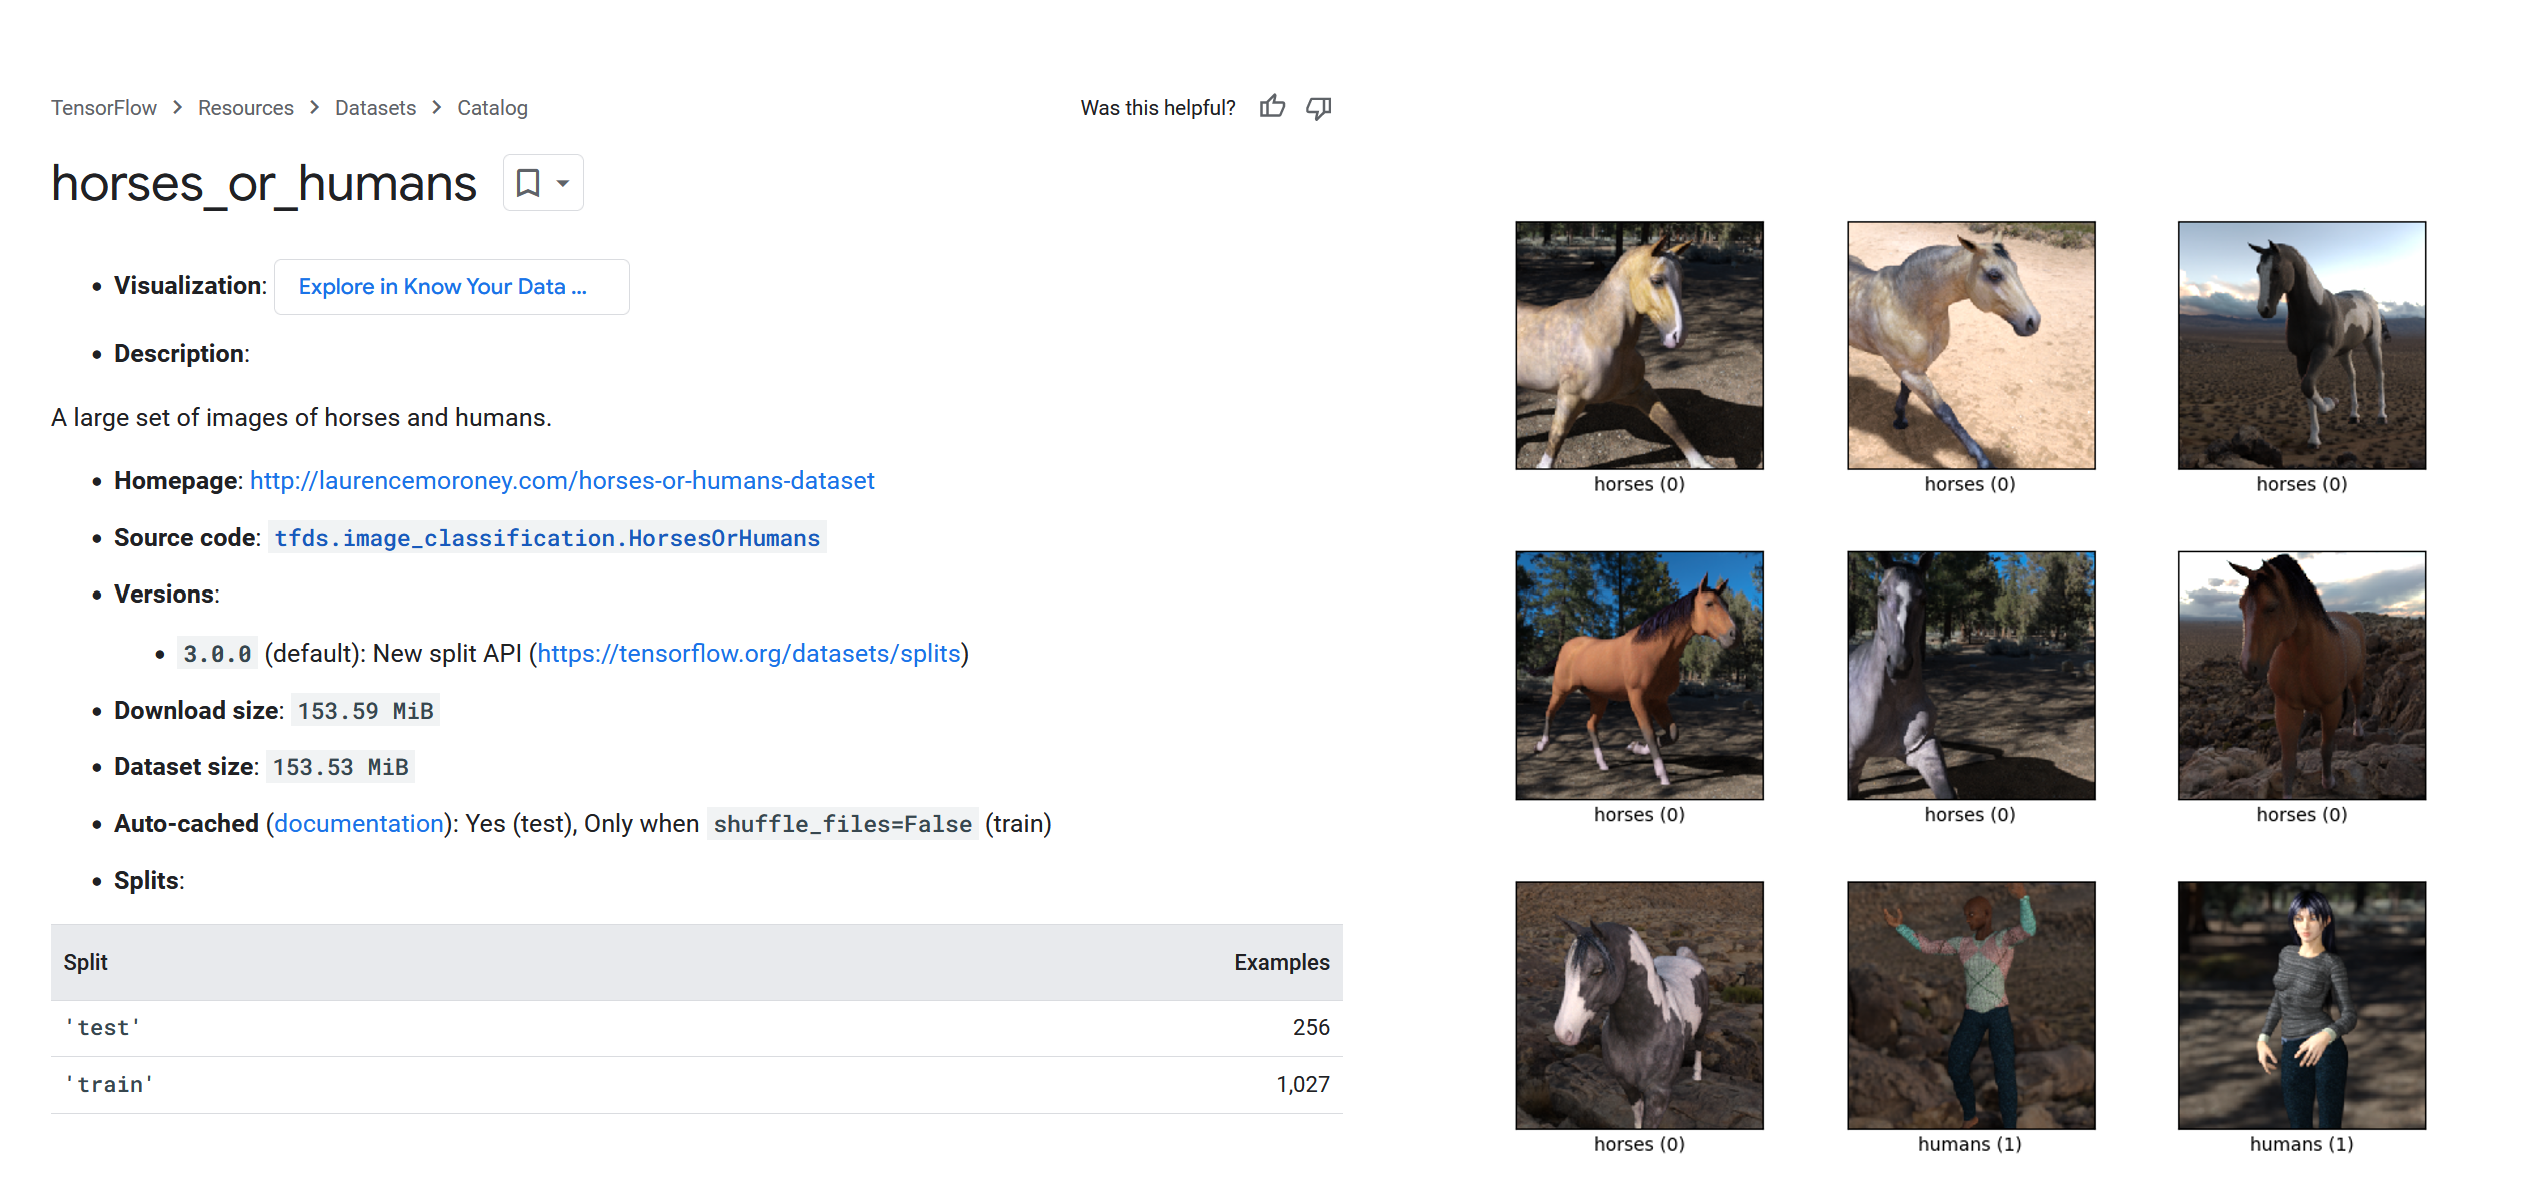

- The "Human or Horse?" dataset is a collection of images of humans and horses.
- The dataset contains a total of 1,000 images for training, with 500 images of humans and 500 images of horses.
- The images are all in color and have a resolution of 300x300 pixels.
- The validation set contains 256 images, with 128 images of humans and 128 images of horses.
- The dataset is balanced, with an equal number of images for each class, to ensure that the model doesn't have a bias towards one class over the other.
- The "Human or Horse?" dataset is commonly used as a benchmark dataset for image classification tasks, and it's a great dataset for beginners to start with when learning about CNNs.

In [ ]:
!pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

In [ ]:
# download dataset
dataset, info = tfds.load('horses_or_humans', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteUHDYN5/horses_or_humans-train.tfrecord*..…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/horses_or_humans/3.0.0.incompleteUHDYN5/horses_or_humans-test.tfrecord*...…

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [ ]:
info
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
class_names = info.features['label'].names
class_names

['horses', 'humans']

In [ ]:
dataset

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [ ]:
for i, example in enumerate(dataset['train']):
  image,label = example[0], example[1]
  save_dir = './horse-or-human/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)
  
  filename = '{}_{}.jpg'.format(class_names[label], i)
  filepath = save_dir + "/" + filename
  
  tf.keras.preprocessing.image.save_img(filepath, image)
  # break


In [ ]:
for i, example in enumerate(dataset['test']):
  image,label = example[0], example[1]
  save_dir = './horse-or-human/test/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok=True)
  
  filename = '{}_{}.jpg'.format(class_names[label], i)
  filepath = save_dir + "/" + filename
  
  tf.keras.preprocessing.image.save_img(filepath, image)
  # break

### Image Preprocessing


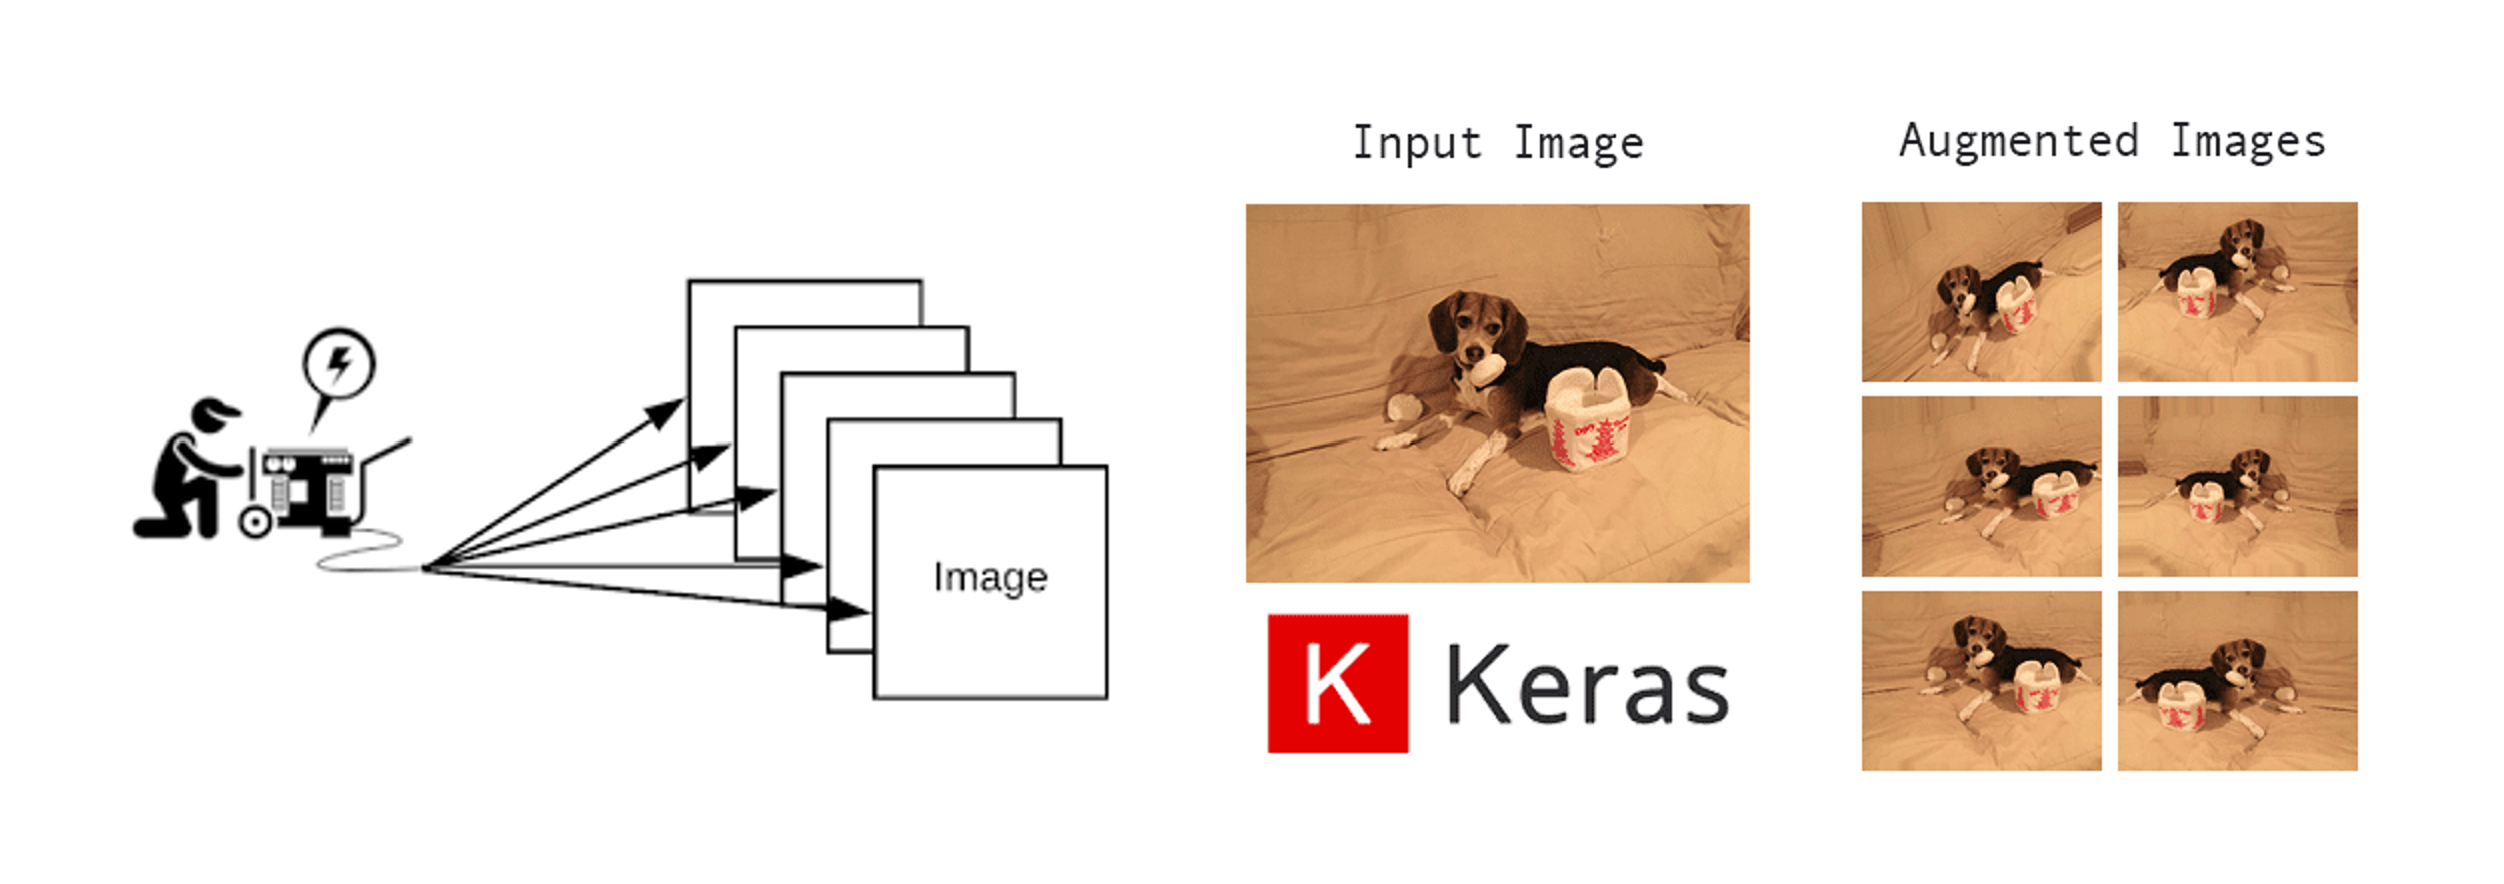

**Image Data Generator**
- The ImageDataGenerator class in Keras can be used to create a data generator object that can be used to load images from a directory and automatically preprocess them.
- The data generator can also perform data augmentation, which is a technique for artificially increasing the size of a training dataset by creating modified versions of images in the dataset.
- Data augmentation is a useful technique for improving the performance of CNNs on small image datasets.
- The data generator can also be used to normalize the pixel values of the images, which is a common preprocessing step for image classification tasks.
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/horse-or-human/train'
image_size = (300, 300)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary'
)

test_dir = '/content/horse-or-human/test'
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'horses': 0, 'humans': 1}

In [ ]:
train_generator.filenames[:5], train_generator.filenames[-5:]

(['horses/horses_0.jpg',
  'horses/horses_1.jpg',
  'horses/horses_1000.jpg',
  'horses/horses_1004.jpg',
  'horses/horses_1005.jpg'],
 ['humans/humans_993.jpg',
  'humans/humans_996.jpg',
  'humans/humans_997.jpg',
  'humans/humans_998.jpg',
  'humans/humans_999.jpg'])

In [ ]:
train_generator.samples

1027

In [ ]:
# data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

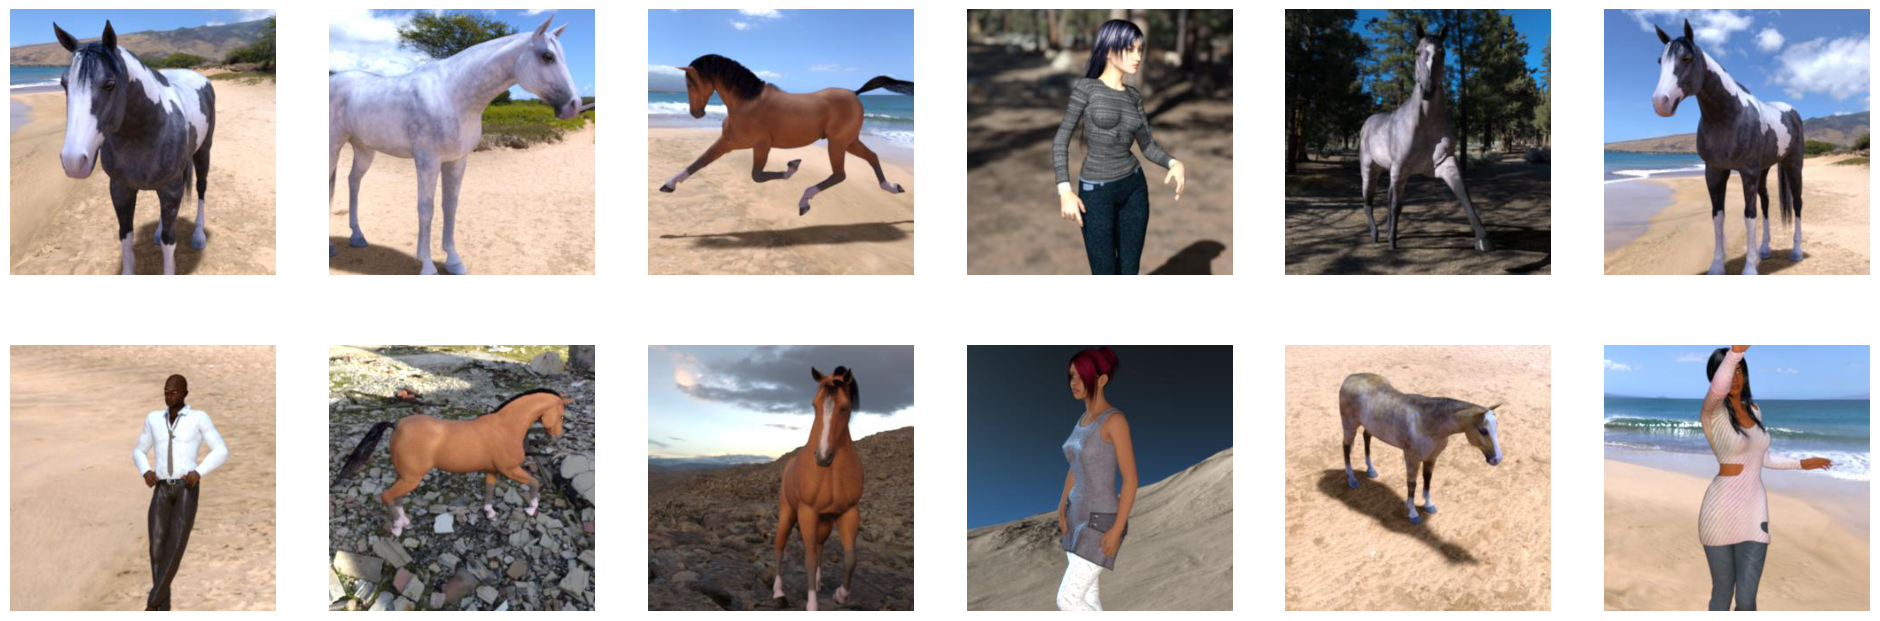

In [ ]:
nrows = 2
ncols = 6
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4) # 16x8

next_batch = train_generator.next()
for i in range(0, nrows*ncols):
  ax = plt.subplot(nrows, ncols, i+1)
  ax.axis('Off')
  plt.imshow(next_batch[0][i])

plt.show()

## Building CNN Model

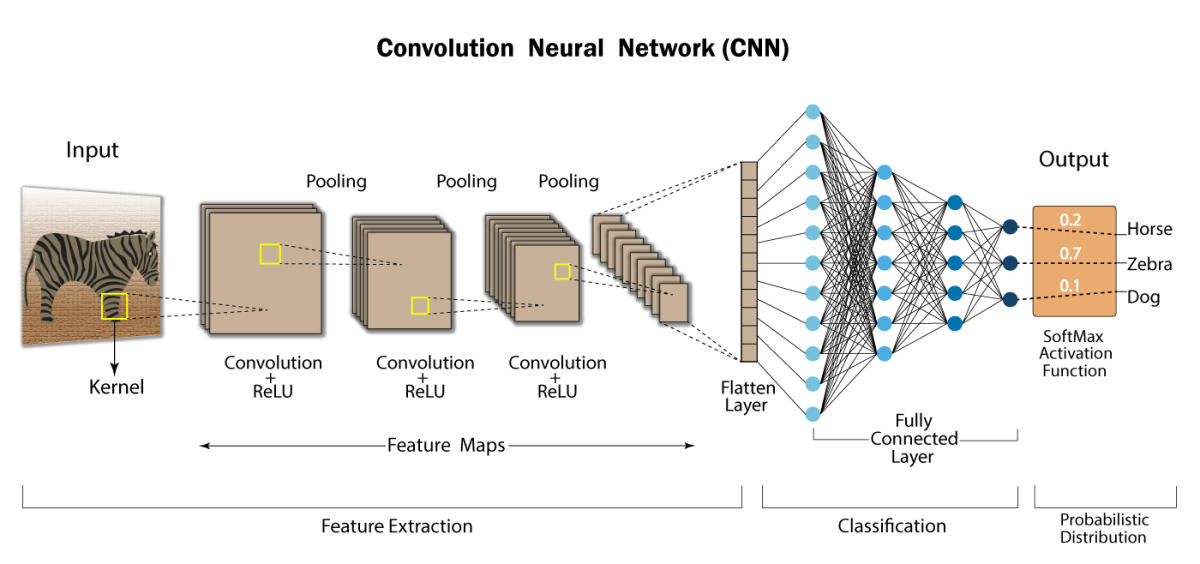


Important parameters:
- **input_shape**: The shape of the input images. This is a 3-tuple of integers, where the first two integers are the height and width of the image, and the third integer is the number of channels.
- **filters**: The number of filters to use in the convolutional layer.
- **kernel_size**: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window.
- **strides**: An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width.
- **padding**: One of `"valid"` or `"same"` (case-insensitive). `"valid"` means no padding. `"same"` results in padding evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
- **activation**: Activation function to use. If you don't specify anything, no activation is applied (ie. "linear" activation: a(x) = x).
- **pool_size**: size of the max pooling windows
- **dropout**: Fraction of the input units to drop. Float between 0 and 1. Fraction of the input units to drop.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
def get_model():
  model = Sequential()
  # 1st layer CNN
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(300,300,3)))
  model.add(MaxPool2D(pool_size=2))

  # 2nd layer CNN
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=2))

  # 3rd layer CNN
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=2))

  # flatten layers and FCN
  model.add(Flatten())
  model.add(Dense(512, activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  return model



In [ ]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 128)      0

In [ ]:
model.layers

In [ ]:
model.layers[0].name

'conv2d'

In [ ]:
weights, biases = model.layers[0].get_weights()

In [ ]:
len(biases)

32

In [ ]:
model.layers[1].get_weights()

[]

In [ ]:
model = get_model()

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
adamax = tf.keras.optimizers.Adamax(learning_rate=0.0001)

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=5, validation_data=test_generator)

Epoch 1/5
33/33 [==============================] - 8s 183ms/step - loss: 0.9239 - accuracy: 0.6212 - val_loss: 0.6768 - val_accuracy: 0.5117
Epoch 2/5
33/33 [==============================] - 7s 197ms/step - loss: 0.4416 - accuracy: 0.8023 - val_loss: 0.6838 - val_accuracy: 0.6367
Epoch 3/5
33/33 [==============================] - 6s 186ms/step - loss: 0.2599 - accuracy: 0.9036 - val_loss: 0.9648 - val_accuracy: 0.6758
Epoch 4/5
33/33 [==============================] - 6s 195ms/step - loss: 0.1262 - accuracy: 0.9640 - val_loss: 1.1813 - val_accuracy: 0.7070
Epoch 5/5
33/33 [==============================] - 6s 188ms/step - loss: 0.0929 - accuracy: 0.9718 - val_loss: 1.0502 - val_accuracy: 0.7578


In [ ]:
history.history

{'loss': [0.9239462614059448,
  0.4416046142578125,
  0.2599486708641052,
  0.12624002993106842,
  0.09293025732040405],
 'accuracy': [0.6212268471717834,
  0.8023369312286377,
  0.9036027193069458,
  0.9639727473258972,
  0.9717624187469482],
 'val_loss': [0.6767558455467224,
  0.683780312538147,
  0.9648382663726807,
  1.181321382522583,
  1.0501811504364014],
 'val_accuracy': [0.51171875, 0.63671875, 0.67578125, 0.70703125, 0.7578125]}

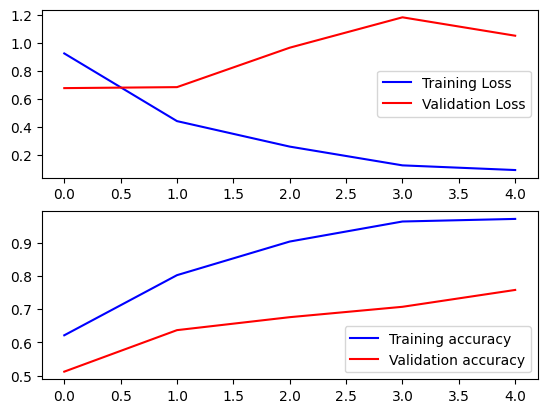

In [ ]:
# plot loss and accuracy curve
fix, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
ax[1].legend(loc='best')

In [ ]:
# save model
model.save('horse-or-human.h5')

In [ ]:
# load model
from tensorflow.keras.models import load_model
model_load = load_model('horse-or-human.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img('/content/horse-or-human/test/humans/humans_111.jpg', target_size=image_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

# predict
prediction = model_load.predict(img)
print(prediction)

TH = 0.5
predicted_class = int(prediction[0][0]>TH)

class_indices = train_generator.class_indices
labels={v:k for k,v in class_indices.items()}
labels[predicted_class]

1/1 [==============================] - 0s 42ms/step
[[0.99992764]]


'humans'